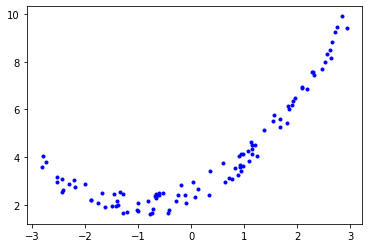

In [42]:
import numpy as np
import matplotlib.pyplot as plt

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.rand(m, 1)

plt.plot(X, y, 'b.');

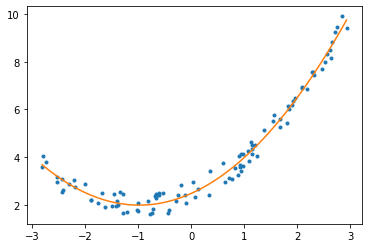

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=True)),
    ('lin_reg', LinearRegression())
])

polynomial_regression.fit(X, y)

X_space = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_hat = polynomial_regression.predict(X_space)

plt.plot(X, y, '.')
plt.plot(X_space, y_hat);

In [49]:
class SGDRegressor():
    # Class for Linear Regression learning with Mini-batch Gradient Descent 
    def __init__(self, batch_size=10, n_epochs=50, learning_rate=0.1, random_state=3141):
        self.batch_size = batch_size
        self.n_epochs = n_epochs
        self.mse = None
        self.theta = None
        self.thetas = None
        self.eta = learning_rate
        self.random_state = random_state
               
        
    def fit(self, X, y):
        np.random.seed(self.random_state)
        
        n = len(X)
        X_b = np.c_[np.ones((len(X), 1)), X]
        self.theta = np.random.randn(X.shape[1] + 1, 1)
        self.mse = np.zeros(int(np.ceil(n / self.batch_size) * self.n_epochs))
        self.thetas = np.zeros((self.mse.size, X_b.shape[1]))
                
        i = 0
        for epoch in range(self.n_epochs):
            shuffled_index = np.arange(n)
            np.random.shuffle(shuffled_index)
            
            X_b_s = X_b[shuffled_index]
            y_s = y[shuffled_index]
            
            for index in range(0, n, self.batch_size):
                self.mse[i] = np.square(X_b.dot(self.theta) - y).mean()
                
                Xi = X_b_s[index:index + self.batch_size]
                yi = y_s[index:index + self.batch_size]

                gradient = 2 / self.batch_size * Xi.T.dot(Xi.dot(self.theta) - yi)

                self.theta -= self.eta * gradient
                
                self.thetas[i] = self.theta.T
                i += 1
                                    
    
    def predict(self, X):       
        X_b = np.c_[np.ones((len(X), 1)), X]
        return X_b.dot(self.theta)
        
    

X_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)

reg = SGDRegressor(learning_rate=0.01, n_epochs=50, batch_size=10)
reg.fit(X_poly, y)
reg.theta

array([[2.45576567],
       [0.99830748],
       [0.52868473]])

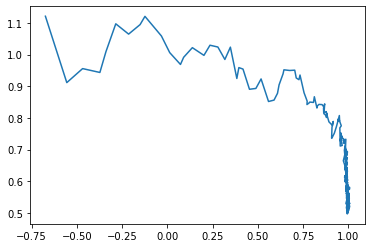

In [50]:
plt.plot(*reg.thetas.T[1:]);

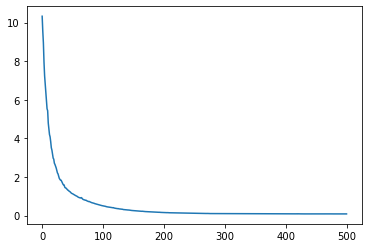

In [51]:
plt.plot(reg.mse);